<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/Read_VIS_and_IR_paintings_(big_ENVI_file).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

In [ ]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# read only part of the cube
#  fopen.seek(bytes) - bytes you skip
#  cube = numpy.fromfile(fopen, dtype=numpy.uint16, count=bytes) - bytes you read
path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/paintings_Madonna_with_two_0015/capture/paintings_Dadonna_with_two_0015.raw"
samples = 2144
bands = 540
lines = 2253
fopen = open(path, "rb")
#line_start = 400
#fopen.seek(samples*bands*line_start*2) # we skip 'line_start' number of lines
line_read = 1300
raw_part = numpy.fromfile(fopen, dtype=numpy.uint16, count=samples*bands*line_read) # we read only 'line_read' number of lines
print('samples*bands*line_read =',samples*bands*line_read)
print('raw_part.shape =', raw_part.shape)
[s1] = raw_part.shape
print(samples*bands*line_read/s1)
cube_part = numpy.reshape(raw_part, (line_read, bands, samples))
#plt.imshow(cube_part[:,100,:]) 
#plt.show()



samples*bands*line_read = 1505088000
raw_part.shape = (1505088000,)
1.0


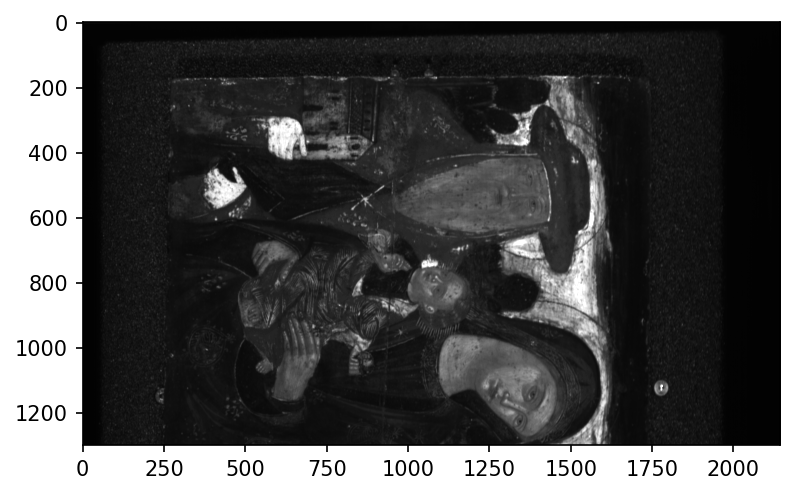

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(cube_part[:,200,:], cmap="gray", vmin=0, vmax=13000)#
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


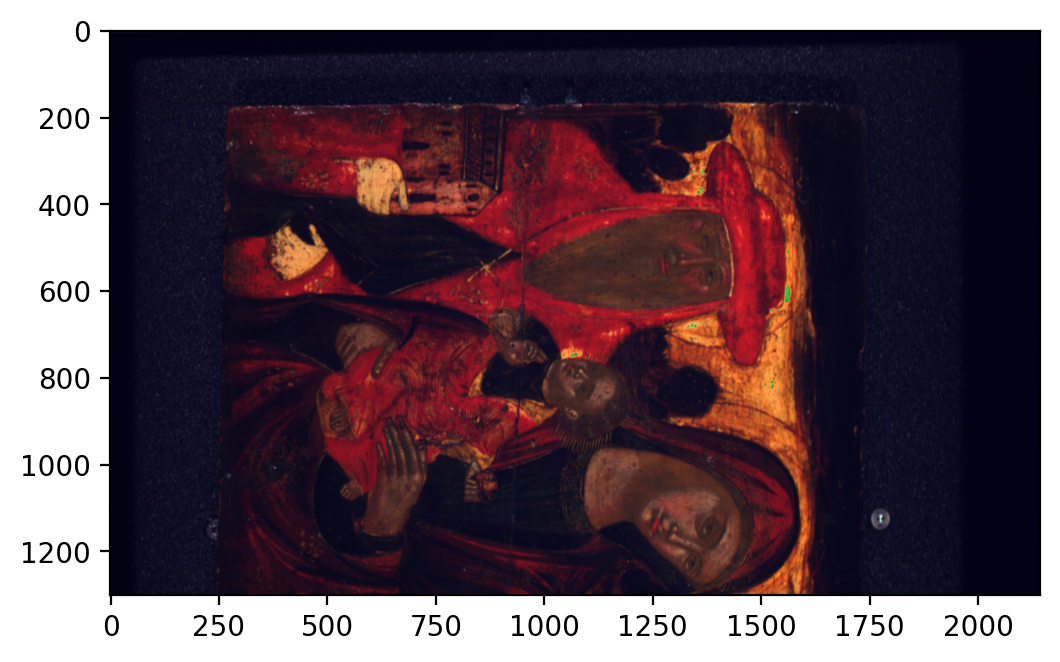

In [ ]:
# Generate RGB preview
import numpy as np
RGB = np.empty((line_read, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 283 # Wavelength 631.15
ch_2 = 183 # Wavelength 528.03
ch_3 = 83 # Wavelength 443.56
RGB[:,:,0] = 2*cube_part[:,ch_1,:]/np.amax(cube_part[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGB[:,:,1] = 2*cube_part[:,ch_2,:]/np.amax(cube_part[:,ch_2,:])
RGB[:,:,2] = 2*cube_part[:,ch_3,:]/np.amax(cube_part[:,ch_3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)
plt.show()

In [ ]:
# Read wavelengths from hdr file
hdr_path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/paintings_Madonna_with_two_0015/capture/paintings_Dadonna_with_two_0015.hdr"

f=open(hdr_path, "r")
filelines = f.readlines()
#print(filelines)
f.close()
n_waves = 540
waves = np.zeros(n_waves,)
n = 0
for i in range(55, 55+n_waves):
  #print(filelines[i])
  waves[n] = float(filelines[i].replace(',',''))
  #print(waves[n])
  n = n + 1
print(waves)   

[ 322.06  323.27  324.47  325.68  326.88  328.08  329.29  330.49  331.7
  332.9   334.11  335.31  336.52  337.73  338.93  340.14  341.35  342.56
  343.76  344.97  346.18  347.39  348.6   349.81  351.01  352.22  353.43
  354.64  355.85  357.07  358.28  359.49  360.7   361.91  363.12  364.33
  365.55  366.76  367.97  369.18  370.4   371.61  372.83  374.04  375.25
  376.47  377.68  378.9   380.11  381.33  382.55  383.76  384.98  386.2
  387.41  388.63  389.85  391.07  392.28  393.5   394.72  395.94  397.16
  398.38  399.6   400.82  402.04  403.26  404.48  405.7   406.92  408.14
  409.36  410.59  411.81  413.03  414.25  415.48  416.7   417.92  419.15
  420.37  421.59  422.82  424.04  425.27  426.49  427.72  428.95  430.17
  431.4   432.62  433.85  435.08  436.31  437.53  438.76  439.99  441.22
  442.45  443.68  444.9   446.13  447.36  448.59  449.82  451.05  452.29
  453.52  454.75  455.98  457.21  458.44  459.68  460.91  462.14  463.37
  464.61  465.84  467.07  468.31  469.54  470.78  472

In [ ]:
print(waves.shape)

(135,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


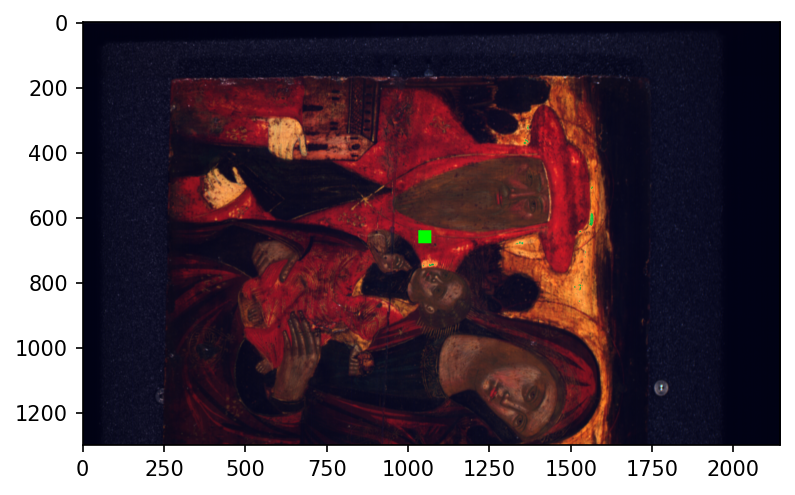

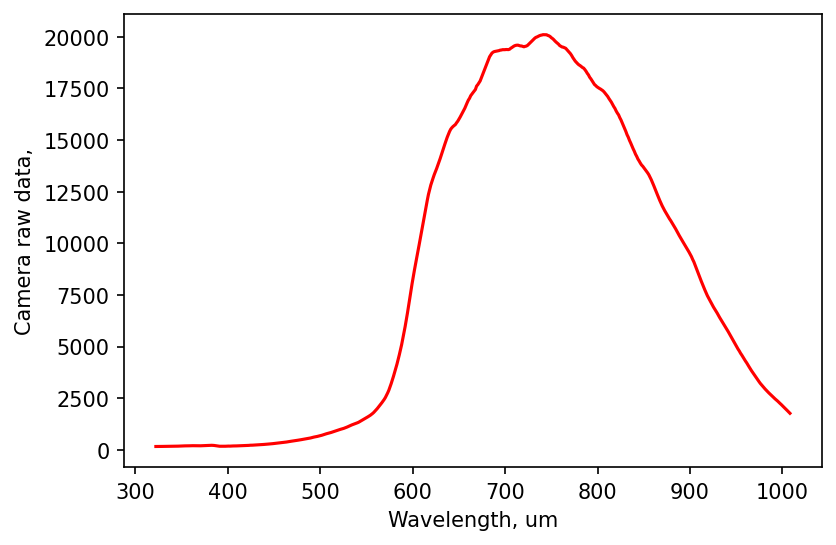

In [ ]:
#Select an areay
RGB2 = RGB.copy()
spectral_image = cube_part.copy()
##################################################################
# Select Red
x1 = 1030
x2 = 1070
y1 = 640
y2 = 680
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 1
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB2)
plt.show()

plt.plot(waves, red, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

1300.0


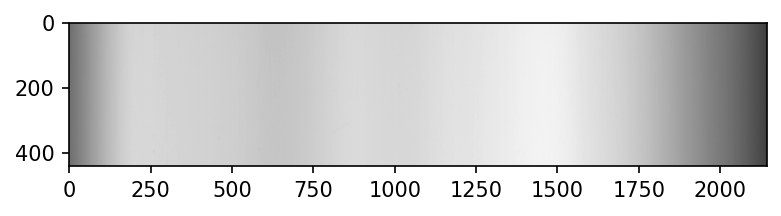

In [ ]:
# read white
white_path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/paintings_Madonna_with_two_0015/capture/WHITEREF_paintings_Dadonna_with_two_0015.raw"
samples = 2144
bands = 540
lines = 442
fopen = open(white_path, "rb")
raw_white = numpy.fromfile(fopen, dtype=numpy.uint16) # we read only 'line_read' number of lines
print(1505088000/2144/540)
white = numpy.reshape(raw_white, (lines, bands, samples))
white_preview = white[:,300,:]
plt.imshow(white_preview, cmap="gray", vmin=0, vmax=65000) 
plt.show()

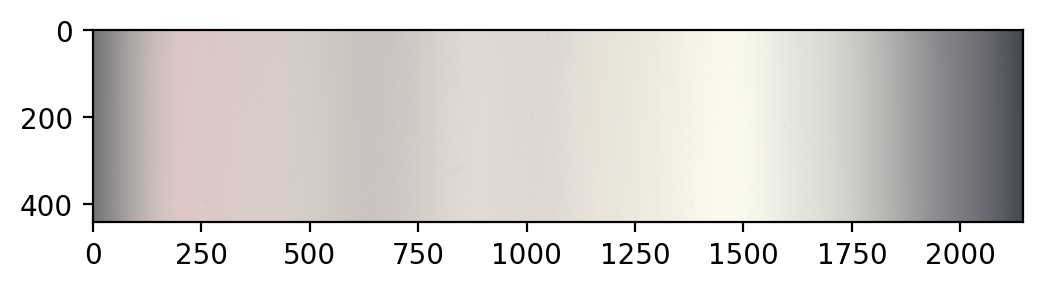

In [ ]:
# Generate RGB preview
import numpy as np
RGBW = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 283 # Wavelength 631.15
ch_2 = 183 # Wavelength 528.03
ch_3 = 83 # Wavelength 443.56
RGBW[:,:,0] = white[:,ch_1,:]/np.amax(white[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBW[:,:,1] = white[:,ch_2,:]/np.amax(white[:,ch_2,:])
RGBW[:,:,2] = white[:,ch_3,:]/np.amax(white[:,ch_3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGBW)
plt.show()

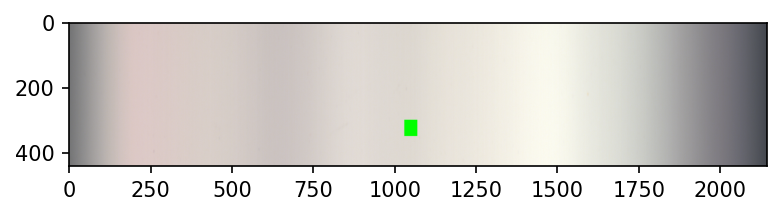

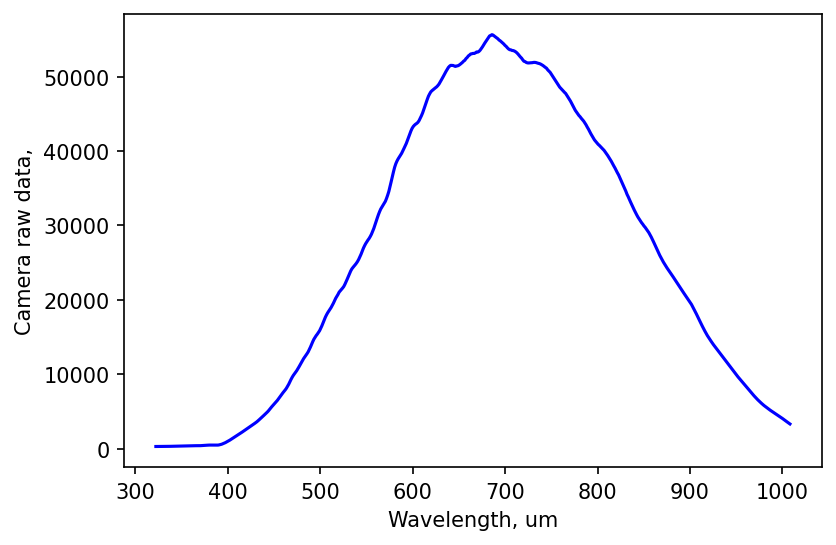

In [ ]:
#Select an areay
RGBW2 = RGBW.copy()
spectral_image = white.copy()
##################################################################
# Select Red
x1 = 1030
x2 = 1070
y1 = 300
y2 = 350
RGBW2[y1:y2,x1:x2,0] = 0
RGBW2[y1:y2,x1:x2,1] = 1
RGBW2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_s = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGBW2)
plt.show()

plt.plot(waves, white_s, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

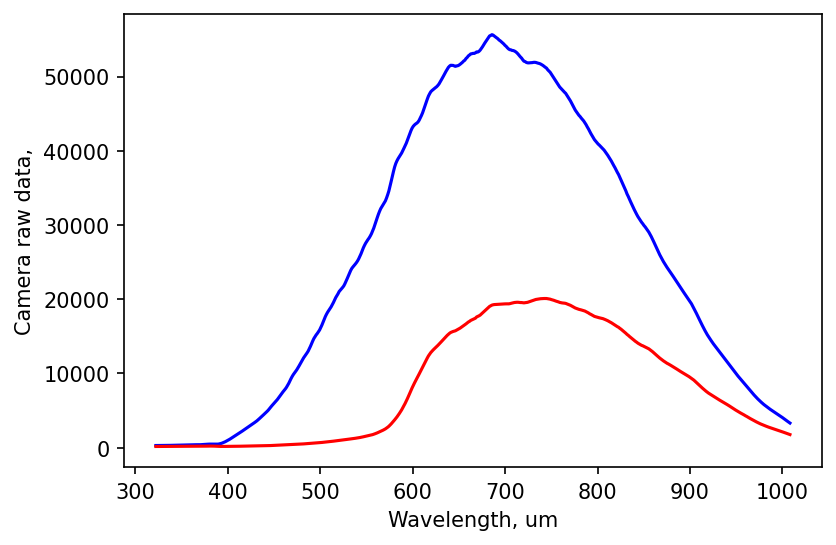

In [ ]:
plt.plot(waves, white_s, "b")
plt.plot(waves, red, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

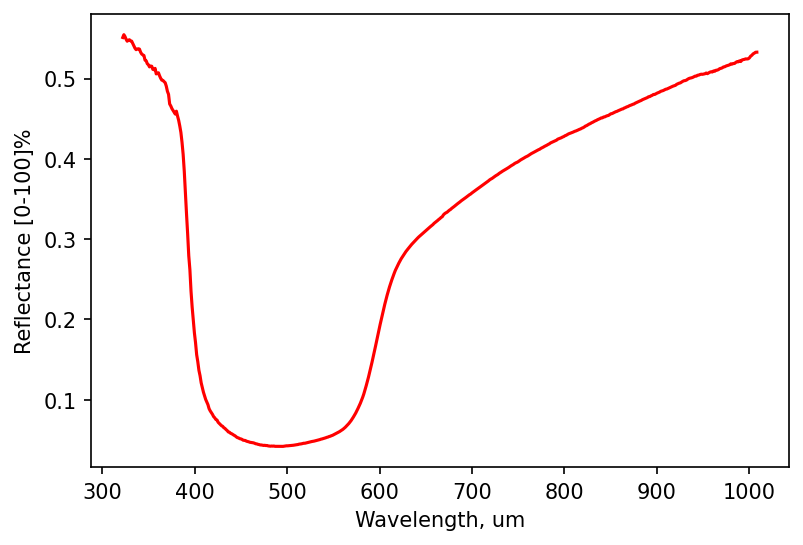

In [ ]:
red_corrected = red/white_s
plt.plot(waves, red_corrected, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

In [ ]:
# ##########################################################################################################
# ##########################################################################################################
#    No do the same for IR
# ##########################################################################################################
# ##########################################################################################################

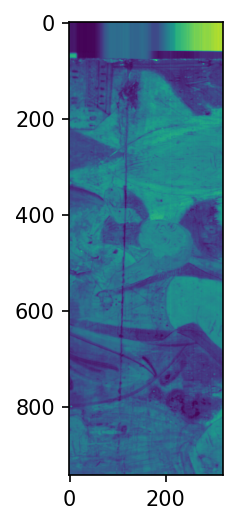

In [ ]:
# read IR
path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/IR_IR1_0019/capture/IR_IR1_0019.raw"
samples = 320
bands = 256
lines = 943
fopen = open(path, "rb")
raw = numpy.fromfile(fopen, dtype=numpy.uint16) # we read only 'line_read' number of lines
IR_cube = numpy.reshape(raw, (lines, bands, samples))
plt.imshow(IR_cube[:,100,:]) 
plt.show()

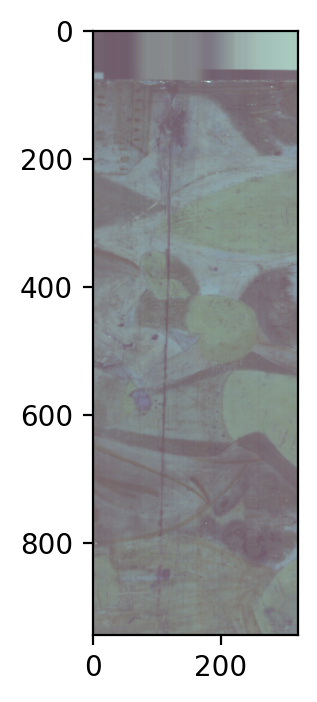

In [ ]:
# Generate RGB preview
import numpy as np
RGBIR = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 200 # Wavelength 631.15
ch_2 = 130 # Wavelength 528.03
ch_3 = 40 # Wavelength 443.56
RGBIR[:,:,0] = IR_cube[:,ch_1,:]/np.amax(IR_cube[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBIR[:,:,1] = IR_cube[:,ch_2,:]/np.amax(IR_cube[:,ch_2,:])
RGBIR[:,:,2] = IR_cube[:,ch_3,:]/np.amax(IR_cube[:,ch_3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGBIR)
plt.show()

In [ ]:
# Read wavelengths from hdr file
hdr_path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/IR_IR1_0019/capture/IR_IR1_0019.hdr"
f=open(hdr_path, "r")
filelines = f.readlines()
#print(filelines)
f.close()
n_waves = 256
wavesIR = np.zeros(n_waves,)
n = 0
for i in range(46, 46+n_waves):
  #print(filelines[i])
  wavesIR[n] = float(filelines[i].replace(',',''))
  #print(waves[n])
  n = n + 1
print(wavesIR)   

[ 918.91  925.31  931.72  938.13  944.53  950.93  957.33  963.73  970.12
  976.52  982.91  989.3   995.69 1002.08 1008.47 1014.85 1021.24 1027.62
 1034.   1040.38 1046.76 1053.14 1059.51 1065.89 1072.26 1078.63 1085.
 1091.37 1097.74 1104.11 1110.47 1116.83 1123.2  1129.56 1135.92 1142.28
 1148.63 1154.99 1161.34 1167.7  1174.05 1180.4  1186.75 1193.1  1199.45
 1205.8  1212.14 1218.49 1224.83 1231.17 1237.51 1243.85 1250.19 1256.53
 1262.87 1269.21 1275.54 1281.87 1288.21 1294.54 1300.87 1307.2  1313.53
 1319.86 1326.19 1332.52 1338.84 1345.17 1351.49 1357.81 1364.14 1370.46
 1376.78 1383.1  1389.42 1395.74 1402.06 1408.37 1414.69 1421.01 1427.32
 1433.64 1439.95 1446.26 1452.58 1458.89 1465.2  1471.51 1477.82 1484.13
 1490.44 1496.75 1503.06 1509.36 1515.67 1521.98 1528.28 1534.59 1540.89
 1547.2  1553.5  1559.8  1566.11 1572.41 1578.71 1585.01 1591.31 1597.61
 1603.91 1610.21 1616.51 1622.81 1629.11 1635.41 1641.71 1648.01 1654.31
 1660.61 1666.9  1673.2  1679.5  1685.79 1692.09 1698

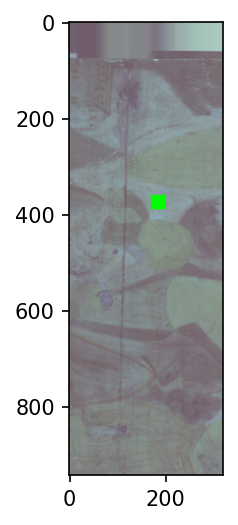

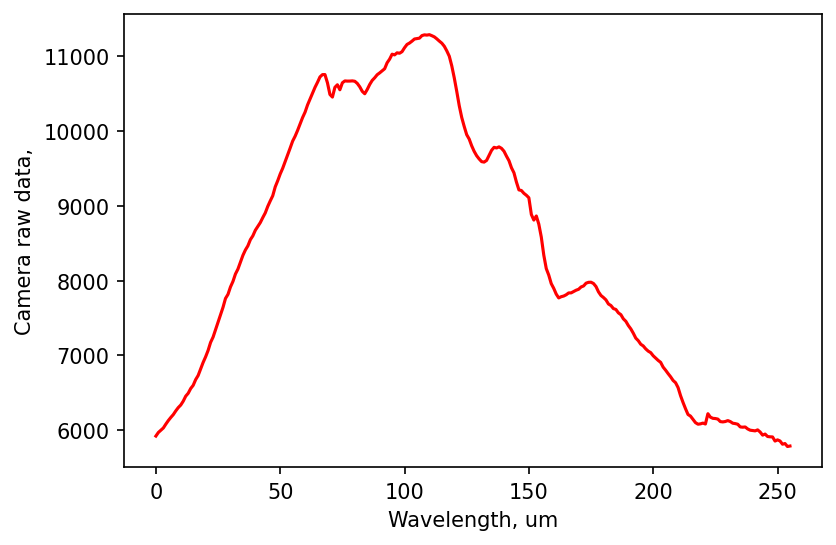

In [ ]:
#Select an areay
RGBIR2 = RGBIR.copy()
spectral_image = cube_part.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 360
y2 = 390
RGBIR2[y1:y2,x1:x2,0] = 0
RGBIR2[y1:y2,x1:x2,1] = 1
RGBIR2[y1:y2,x1:x2,2] = 0
sel = IR_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
redIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGBIR2)
plt.show()

plt.plot(redIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

1300.0


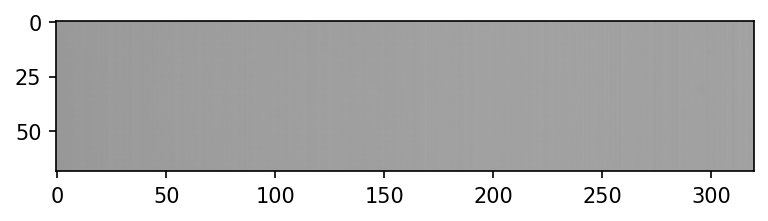

In [ ]:
# read white
white_path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/IR_IR1_0019/capture/WHITEREF_IR_IR1_0019.raw"
samples = 320
bands = 256
lines = 69
fopen = open(white_path, "rb")
raw_white_IR = numpy.fromfile(fopen, dtype=numpy.uint16) # we read only 'line_read' number of lines
print(1505088000/2144/540)
whiteIR = numpy.reshape(raw_white_IR, (lines, bands, samples))
white_previewIR = whiteIR[:,100,:]
plt.imshow(white_previewIR, cmap="gray", vmin=0, vmax=25000) 
plt.show()

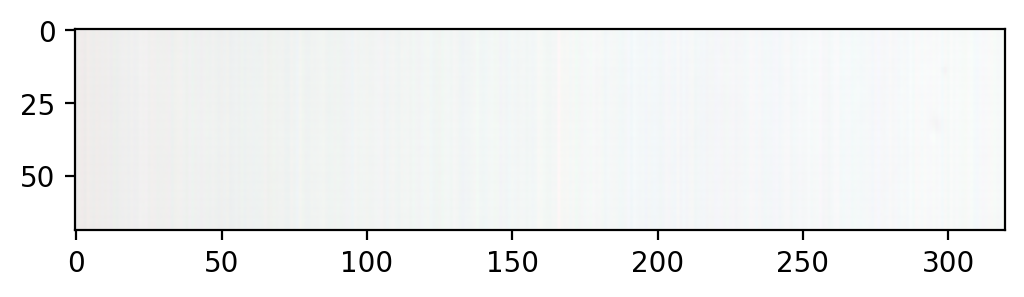

In [ ]:
# Generate RGB preview
import numpy as np
RGBWIR = np.empty((lines, samples, 3)) # Create a 'bmp' array with spatial size of ENVI 512,512 with 3 layers
# We go to hdr file and select channels
ch_1 = 200 # Wavelength 631.15
ch_2 = 130 # Wavelength 528.03
ch_3 = 40 # Wavelength 443.56
RGBWIR[:,:,0] = whiteIR[:,ch_1,:]/np.amax(whiteIR[:,ch_1,:]) # np.amax gets max value. Thus we get RGB in range [0,1]
RGBWIR[:,:,1] = whiteIR[:,ch_2,:]/np.amax(whiteIR[:,ch_2,:])
RGBWIR[:,:,2] = whiteIR[:,ch_3,:]/np.amax(whiteIR[:,ch_3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGBWIR)
plt.show()

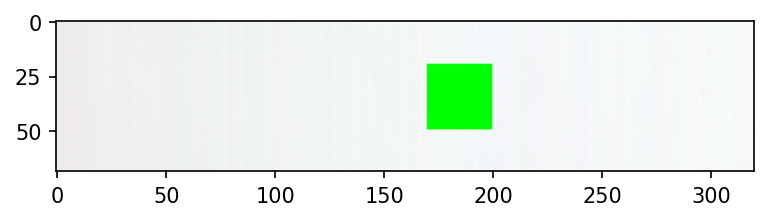

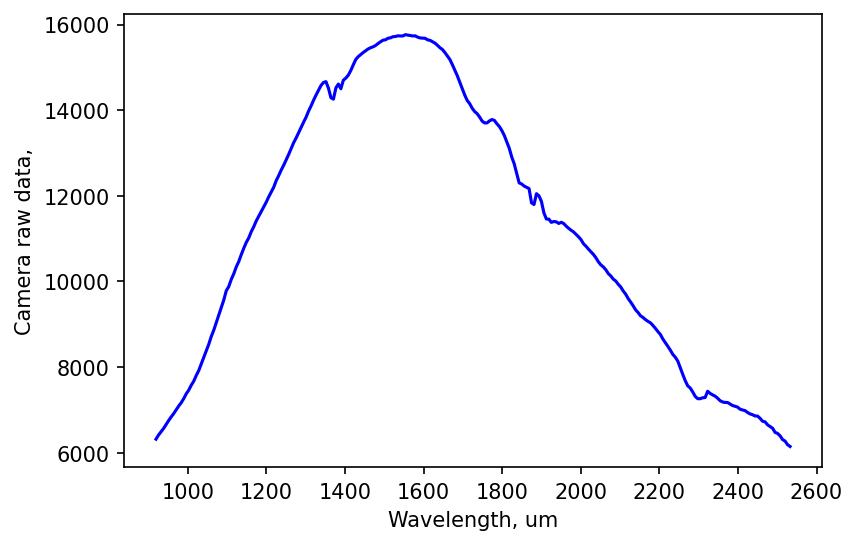

In [ ]:
#Select an areay
RGBWIR2 = RGBWIR.copy()
spectral_image = whiteIR.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 20
y2 = 50
RGBWIR2[y1:y2,x1:x2,0] = 0
RGBWIR2[y1:y2,x1:x2,1] = 1
RGBWIR2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white_sIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGBWIR2)
plt.show()

plt.plot(wavesIR, white_sIR, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

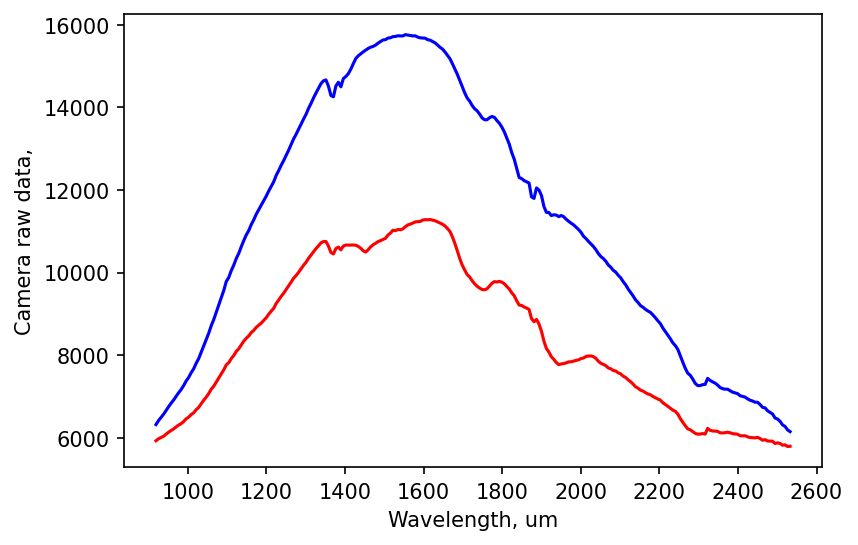

In [ ]:
plt.plot(wavesIR, white_sIR, "b")
plt.plot(wavesIR, redIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

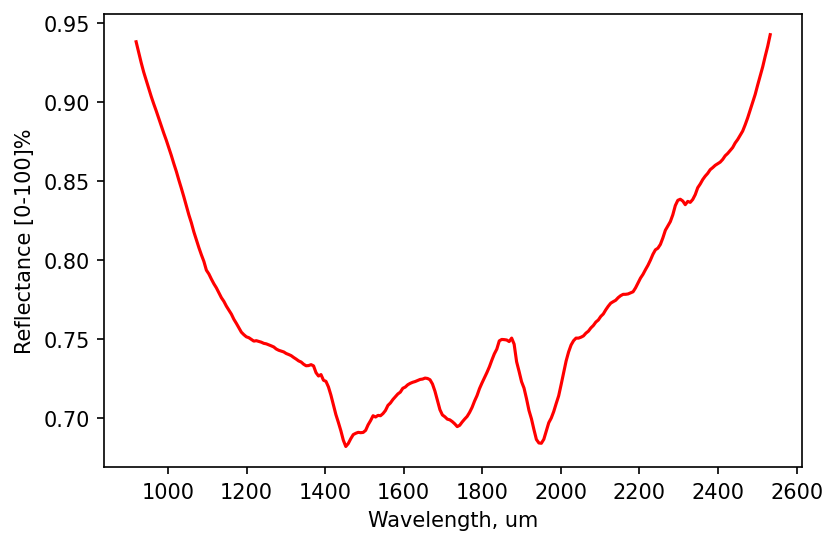

In [ ]:
red_correctedIR = redIR/white_sIR
plt.plot(wavesIR, red_correctedIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

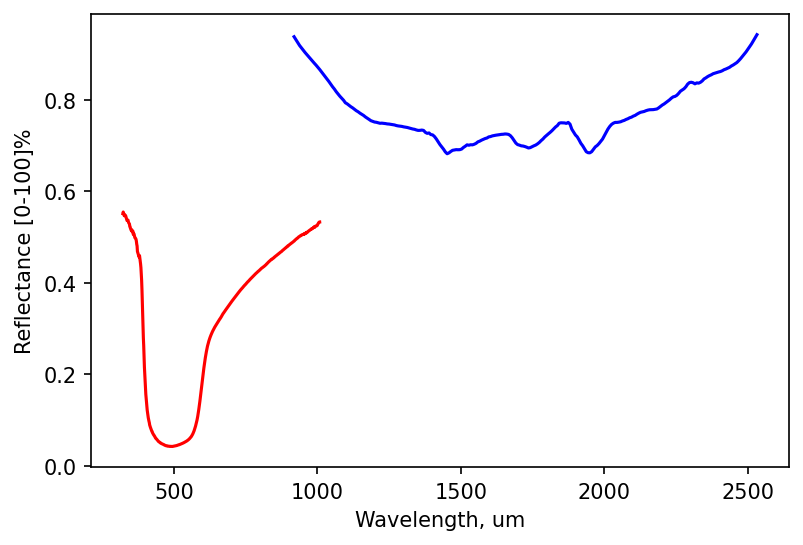

In [ ]:
plt.plot(waves, red_corrected, "r")
plt.plot(wavesIR, red_correctedIR, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

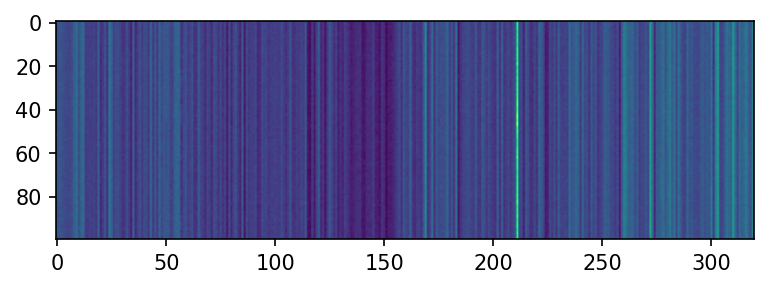

In [ ]:
# load IR dark
# read IR
path = "/content/drive/MyDrive/Colab Notebooks/Painting from local mueseum/Paintings from Museum 18.12.2016/Paintings/IR_IR1_0019/capture/DARKREF_IR_IR1_0019.raw"
samples = 320
bands = 256
lines = 100
fopen = open(path, "rb")
raw = numpy.fromfile(fopen, dtype=numpy.uint16) # we read only 'line_read' number of lines
IR_dark = numpy.reshape(raw, (lines, bands, samples))
plt.imshow(IR_dark[:,100,:]) 
plt.show()

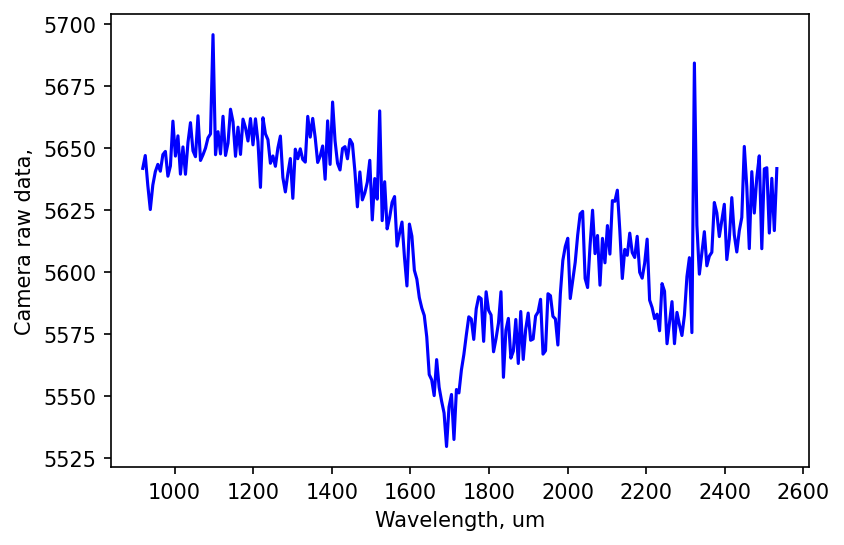

In [ ]:
#Select an areay
spectral_image = IR_dark.copy()
##################################################################
# Select Red
x1 = 170
x2 = 200
y1 = 20
y2 = 50
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
dark_sIR = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150

plt.plot(wavesIR, dark_sIR, "b")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

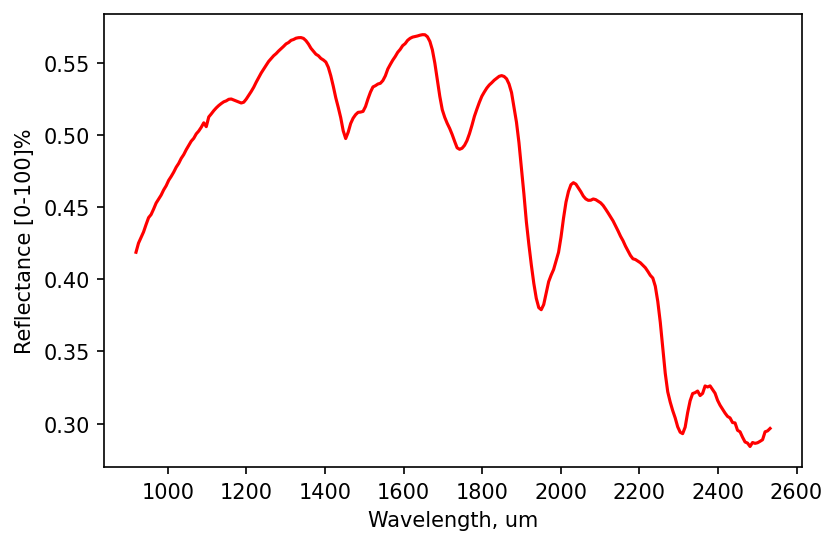

In [ ]:
red_correctedddIR = (redIR-dark_sIR)/(white_sIR-dark_sIR)
plt.plot(wavesIR, red_correctedddIR, "r")

plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

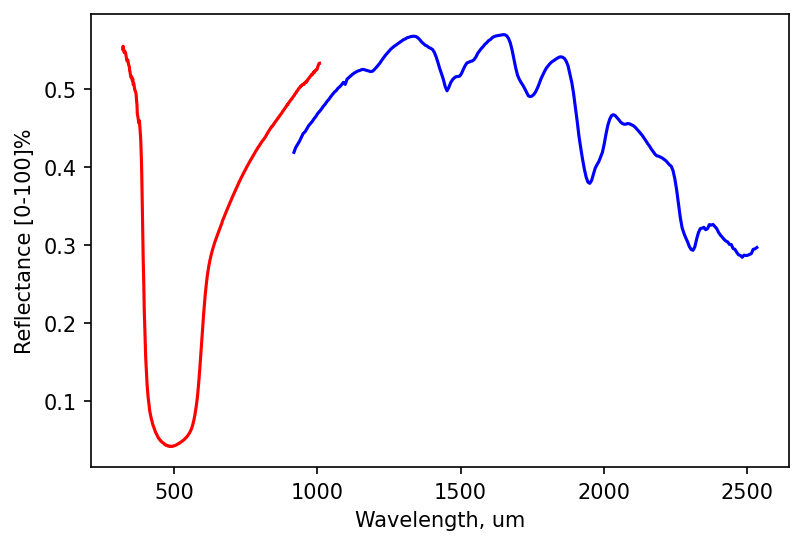

In [ ]:
plt.plot(waves, red_corrected, "r")
plt.plot(wavesIR, red_correctedddIR, "b")
plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()